# Chapter 3. 데이터 소스의 서식과 가공

## 웹의 다양한 데이터 형식
>### 텍스트 데이터와 바이너리 데이터
- 텍스트 데이터는 일반적으로 텍스트 에디터로 편집할 수 있는 데이터 포맷
    - 자연어(한국어, 영어, 일본어 등) 및 숫자로 구성
    - 특수하게 줄 바꿈과 탭 등 제어 문자도 포함
    - XML, JSON, CSV 등
- 텍스트 데이터 이외의 데이터를 바이너리 데이터라고 부름
    - 바이너리는 문자와 상관없이 데이터를 사용할 수 있는 데이터 영역을 활용하는 데이터 형식
    - 텍스트 에디터로 열 수 없으며, 시각적으로 확인해도 의미를 알 수 없는 문자열로 표현
    - 텍스트 데이터보다 크기가 작음
        - 텍스트 3byte 파일을 바이너리 1btye로 저장
    - 동영상, 이미지 등은 대부분 바이너리 데이터

>### XML(extensible markup language) 분석
- XML은 텍스트 데이터를 기반으로 하는 형식
- 범용적인 형식으로 널리 사용
- 웹 API가 XML 형식을 활용
- 특정 목적에 따라서 태그로 감싸 마크업하는 범용적인 방식
- XML은 데이터를 계층 구조로 표현
    - 어떤 데이터 아래 서브 데이터를 추가 가능
- XML 기본 구조
        <요소 속성="값">내용</요소>
    - <요소> 태그로 감싸 마크업
    - 원한느 요소 이름을 사용
    - 하나의 요소에 속성을 사용해 여러 값을 추가로 지정
            <product id="S001" price="45000">SD 카드</product>
    - 다른 요소의 그룹으로 묶어 요소들이 계층 구조를 갖도록 작성
            <products type="전자제품>
                <product id="S001" price="45000">SD 카드</product>
                <product id="S002" price="32000">마우스</product>
            <products>

>### 파이썬으로 XML 분석하기
- BeautifulSoup을 이용하여 XML을 분석
- http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnld=108

In [1]:
from bs4 import BeautifulSoup
import urllib.request as req
import os.path

url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnld=108'
savename = 'forecast.xml'
if not os.path.exists(savename):
    req.urlretrieve(url, savename) # 로컬 파일로 저장

# BeautifulSoup으로 분석
with open(savename, 'r', encoding='utf-8') as f:
    xml = f.read()
    soup = BeautifulSoup(xml, 'html.parser') # html.parser 사용시 데이터의 태그를
                                             # 소문자로 처리
                                             # 따라서 소문자로 태그 입력
    # 각 지역 확인하기
    info = {}
    for location in soup.find_all('location'):
        name = location.find('city').string
        weather = location.find('wf').string
        if not (weather in info):
            info[weather] = []
        info[weather].append(name)
    
    # 각 지역의 날씨를 구분해서 출력하기
    for weather in info.keys():
        print('\n+', weather)
        for name in info[weather]:
            print(' | -', name)


+ 맑음
 | - 서울
 | - 인천
 | - 수원
 | - 파주
 | - 이천
 | - 평택
 | - 춘천
 | - 원주
 | - 강릉
 | - 대전
 | - 세종
 | - 홍성
 | - 청주
 | - 충주
 | - 영동
 | - 광주
 | - 목포
 | - 여수
 | - 순천
 | - 광양
 | - 나주
 | - 전주
 | - 군산
 | - 정읍
 | - 남원
 | - 고창
 | - 무주
 | - 부산
 | - 울산
 | - 창원
 | - 진주
 | - 거창
 | - 통영
 | - 대구
 | - 안동
 | - 포항
 | - 경주
 | - 울진
 | - 울릉도

+ 구름많음
 | - 제주
 | - 서귀포


>### JSON 분석
- JSON도 텍스트 데이터를 기반으로 하는 가벼운 데이터 형식
- JSON은 자바스크립트에서 사용하는 객체 표기 방법을 기반
- JSON은 자바스크립트 전용 데이터 형식은 아니며, 다양한 소프트웨어와 프로그래밍 언어끼리 데이터를 교환할 때 사용
- 확장자는 .json
- 파이썬 표준 모듈에도 json이 포함
- JSON의 구조
    - 숫자, 문자열, 논리, 배열, 객체, null의 6가지 종류의 데이터를 사용
    <table class="table table-striped table-bordered" style="width:600px">
        <thead>
            <tr>
                <th style="width:100px">자료형</th>
                <th style="width:250px">표현 방법</th>
                <th style="width:250px">사용 예</th>
            <tr>
        </thead>
        <tbody>
            <tr>
                <td>숫자</td>
                <td>숫자</td>
                <td>30</td>
            </tr>
            <tr>
                <td>문자열</td>
                <td>큰 따옴표로 감싸 표현</td>
                <td>"str"</td>
            </tr>
            <tr>
                <td>논리</td>
                <td>true 또는 false</td>
                <td>true, false</td>
            </tr>
            <tr>
                <td>배열</td>
                <td>[n1, n2, n3, ...]</td>
                <td>[1, 2, 10, 500]</td>
            </tr>
            <tr>
                <td>객체</td>
                <td>{"key1":value, "key2":value, ...}</td>
                <td>{"org":50, "com":10}</td>
            </tr>
            <tr>
                <td>null</td>
                <td>null</td>
                <td>null</td>
            </tr>
        </tbody>
    </table>
- 규칙은 단순하지만 배열 안에 객체를 넣거나 객체 안에 배열을 넣는 방법 등으로 복잡한 데이터를 표현
- JSON의 배열은 파이썬의 리스트, 객체는 파이썬의 dictionary와 동일
    - JSON 데이터 : https://api.github.com/repositories
    - 깃허브(github)는 Git을 사용하는 프로젝트를 지원하는 웹 호스팅 서비스로 오픈 소스 코드 저장소로 유명
    - 무작위로 레파지토리의 이름과 소유자를 추출해서 출력

In [2]:
import urllib.request as req
import os.path, random
import json

# JSON 데이터 내려받기
url = 'https://api.github.com/repositories'
savename = 'repo.json'
if not os.path.exists(savename):
    req.urlretrieve(url, savename)

# JSON 파일 분석하기
with open(savename, 'r', encoding='utf-8') as f:
#     items = json.load(f)
    json_data = f.read()
    items = json.loads(json_data)
    for item in items:
        print(item['name'] + " - " + item['owner']['login'])

grit - mojombo
merb-core - wycats
rubinius - rubinius
god - mojombo
jsawesome - vanpelt
jspec - wycats
exception_logger - defunkt
ambition - defunkt
restful-authentication - technoweenie
attachment_fu - technoweenie
microsis - caged
s3 - anotherjesse
taboo - anotherjesse
foxtracs - anotherjesse
fotomatic - anotherjesse
glowstick - mojombo
starling - defunkt
merb-more - wycats
thin - macournoyer
resource_controller - jamesgolick
markaby - jamesgolick
enum_field - jamesgolick
subtlety - defunkt
zippy - defunkt
cache_fu - defunkt
phosphor - KirinDave
sinatra - bmizerany
gsa-prototype - jnewland
duplikate - technoweenie
lazy_record - jnewland
gsa-feeds - jnewland
votigoto - jnewland
mofo - defunkt
xhtmlize - jnewland
ruby-git - ruby-git
bmhsearch - ezmobius
mofo - uggedal
simply_versioned - mmower
gchart - abhay
schemr - benburkert
calais - abhay
chronic - mojombo
git-wiki - sr
signal-wiki - queso
ruby-on-rails-tmbundle - drnic
low-pro-for-jquery - danwrong
merb-core - wayneeseguin
dst - s

>- JSON 형식으로 출력

In [3]:
# JSON 데이터 내려받기
price = {
    'date' : '2019-07-02',
    'price':{
        'Apple':80,
        'Orange':55,
        'Banana':40
    }}
s = json.dumps(price)
print(s)

{"date": "2019-07-02", "price": {"Apple": 80, "Orange": 55, "Banana": 40}}


>### 엑셀 파일 분석
- 파이썬에서 엑셀 파일을 읽고 쓸 때는 파이썬-엑셀 라이브러리를 사용
- openpyxl 패키지 설치
    - `pip install openpyxl`
- 엑셀 데이터
    - http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1041
    - http://www.index.go.kr/strata/jsp/downloadStblGams2.jsp

In [4]:
from openpyxl import load_workbook, styles

# 엑셀 파일 열기
filename = "C:\workspace\KSA\data\modeule04\ch01".replace('\\', '/') + '/' + 'stats_104102.xlsx'
book = load_workbook(filename)

# 맨 앞의 시트 추출하기
sheet = book.worksheets[0]

# 시트의 각 행을 순서대로 추출하기
data = []
for row in sheet.rows:
    data.append(
        [row[0].value,
        row[9].value]
    )

print(data, '\n')

# 필요없는 줄(헤더, 연도, 계) 제거하기
del data[0]
del data[1]
del data[2]

# 데이터를 인구 순서로 정렬
data = sorted(data, key=lambda x : x[1])

# 하위 5위를 출력
for ix, a in enumerate(data):
    if ix >= 5:
        break
    print(ix + 1, a[0], int(a[1]))

[['시도별 인구 변동 현황 [단위 : 천명]', None], [None, 2017], ['계', 51778], ['서울', 9857], ['부산', 3470], ['대구', 2475], ['인천', 2948], ['광주', 1463], ['대전', 1502], ['울산', 1165], ['세종', 280], ['경기', 12873], ['강원', 1550], ['충북', 1594], ['충남', 2116], ['전북', 1854], ['전남', 1896], ['경북', 2691], ['경남', 3380], ['제주', 657]] 

1 세종 280
2 제주 657
3 울산 1165
4 광주 1463
5 대전 1502


In [5]:
# 엑셀 파일 열기
filename = "C:\workspace\KSA\data\modeule04\ch01".replace('\\', '/') + '/' + 'stats_104102.xlsx'
book = load_workbook(filename)

# 활성화된 시트 추출하기
sheet = book.active

# 서울을 제외한 인구를 구해서 쓰기
for i in range(9):
    total = int(sheet[str(chr(i + 66)) + '3'].value) # B~J 열의 3행(계) 자료 읽기
    seoul = int(sheet[str(chr(i + 66)) + '4'].value) # B~J 열의 4행(서울) 자료 읽기
    output = total - seoul
    print('서울 제외 인구 =', output)
    # 쓰기
    sheet[str(chr(i + 66)) + '21'] = output
    cell = sheet[str(chr(i + 66)) + '21'] # 21행에 계산한 데이터 새로 쓰기
    
    # 폰트와 색상 변경하기
    cell.font = styles.Font(size=14, color='FF0000')
    cell.number_format = cell.number_format
    
# 엑셀 파일 저장하기
filename = "C:\workspace\KSA\data\modeule04\ch01".replace('\\', '/') + '/' + 'population2.xlsx'
book.save(filename)

서울 제외 인구 = 39565
서울 제외 인구 = 40203
서울 제외 인구 = 40484
서울 제외 인구 = 40753
서울 제외 인구 = 40997
서울 제외 인구 = 41225
서울 제외 인구 = 41507
서울 제외 인구 = 41766
서울 제외 인구 = 41921


>### Pandas를 이용해 엑셀 파일 읽고 쓰기
- Pandas로 엑셀을 수정하려면 `xlrd`모듈이 필요
- 설치 : `pip install xlrd`

In [6]:
import pandas as pd

filename = "C:\workspace\KSA\data\modeule04\ch01".replace('\\', '/') + '/' + 'stats_104102.xlsx'
sheet_name = 'stats_104102'
book = pd.read_excel(filename, sheet_name=sheet_name, header=1) # 엑셀의 2행을 헤더로

# 2015년 인구로 정렬
book = book.sort_values(by=2015, ascending=False)
book

,Unnamed: 0,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,계,49773,50515,50734,50948,51141,51328,51529,51696,51778
9,경기,11460,11787,11937,12093,12235,12358,12522,12716,12873
1,서울,10208,10312,10250,10195,10144,10103,10022,9930,9857
2,부산,3543,3568,3551,3538,3528,3519,3513,3498,3470
16,경남,3250,3291,3309,3319,3333,3350,3364,3373,3380
4,인천,2710,2758,2801,2844,2880,2903,2925,2943,2948
15,경북,2669,2690,2699,2698,2699,2701,2702,2700,2691
3,대구,2489,2512,2508,2506,2502,2493,2487,2484,2475
12,충남,2037,2075,2101,2029,2048,2062,2077,2096,2116
14,전남,1913,1918,1914,1910,1907,1906,1908,1903,1896


## Chapter 4. 요약
- Python은 웹 스크레핑을 위한 다양한 라이브러리를 제공
- 웹 상의 다양한 데이터를 Python으로 Load할 수 있음
    - Python에서 스크레핑 기초를 습득하므로서 웹 데이터 수집의 기본지식 확보
    - 빅데이터 처리를 위한 자료 수집기술 확보
        - 빅데이터 수집과 관련된 다양한 기법 습득
        - 현장 문제에 적용 가능한 수준까지 프로그래밍 기술 습득

# **Part 2. 텍스트 분석**<br>
### **학습 목표**
- Python 텍스트 분석을 이해한다.
- 텍스트 자료의 시각화 방법에 대해서 이해한다.
- 나이브 베이브 분석 방법을 이해한다.
- 텍스트 유사성 측정 방법을 이해한다.

### **주요 내용**
- 한글 형태소 분석
- 워드클라우드 작성
- 나이브 베이즈 분석을 이용한 분류 방법
- 유사성 측도를 이용한 문장의 유사성 판단 방법

# Chapter 1. 한국어 형태소 분석<br>
## 한국어 분석(형태소 분석)
>### 형태소 분석
- 자연어의 문장을 "형태소"라는 의미를 갖는 최소 단위로 분할하고 품사를 판별하는 작업
    - **형태소** : 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위
- 기계 번역, 텍스트 마이닝 등에서 활용
- 영어는 형태소마다 띄어쓰기로 하여 문장을 구성하기 때문에 어렵지 않음
- 아시아 언어의 분석은 문법 규칙에 의한 방법과 확률적 언어 모델을 사용하는 방법 등을 활용
    - 품사 사전과 문법 사전을 기반으로 대조하면서 형태소를 분석

>### 한국 형태소 분석 라이브러리
- 다양한 형태소 분석 라이브러리가 오픈소스로 제공
- 파이썬에서는 `KoNLPy`(http://konlpy.org/ko/latest/) 를 사용
- 설치 방법론
    - https://konlpy-ko.readthedocs.io/ko/v0.4.3/
    - https://ellun.tistory.com/46
    - 첫 번째, Java 1.7+ 설치
        - https://limkydev.tistory.com/61
        - https://www.java.com/ko/download/windows-64bit.jsp
    - 두 번째, Jave Home 설정
        - https://docs.oracle.com/cd/E19182-01/820-7851/inst_cli_jdk_javahome_t/index.html
    - 세 번째, JPype1 (>=0.5.7)을 다운로드 받고 설치. 다운 받은 .whl 파일을 설치하기 위해서는 `pip`를 업그레이드 해야할 수 있음
        - `pip install --upgrade pip`
        - `pip install JPype1-0.7.0-cp36-cp36m-win_amd64.whl`
    - 네 번째, 명령 프롬프트로 KoNLPy 설치하기
        - `pip install konlpy`

In [8]:
# from konlpy.tag import Twitter
from konlpy.tag import Okt, Komoran, Hannanum, Kkma

# twitter 객체를 생성
okt, kmr, han, kma = Okt(), Komoran(), Hannanum(), Kkma()

# pos 메서드로 형태소 분석 (norm 옵션 : 단어 변환, stem 옵션 : 원형 단어 변환)
# norm 옵션 : "그래욬ㅋㅋㅋ?" -> "그래요" 변환, stem 옵션 : "그렇다" 변환
print(okt.pos('아버지 가방에 들어가신다'))
print(okt.pos('아버지 가방에 들어가신다', norm=True, stem=True))
print(kmr.pos('아버지 가방에 들어가신다'))
print(han.pos('아버지 가방에 들어가신다'))
# print(kma.pos('아버지 가방에 들어가신다'))

C:\Users\Affinity\.conda\envs\ds\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb')]
[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]
[('아버지', 'N'), ('가방', 'N'), ('에', 'J'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('시ㄴ다', 'E')]


>### 출현 빈도 분석
- 각 형태소별로 언어 정보 나눔터 말뭉치 데이터베이스
    - https://ithub.korean.go.kr/user/total/database/corpusManager.do

In [9]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter

# utf-16 인코딩으로 파일을 열고 글자를 출력하기 --- (%1)
file_path_ch02 = 'C:\workspace\KSA\data\modeule04\ch02'.replace('\\', '/') + '/'
fp = codecs.open(file_path_ch02 + 'BEXX0003.txt', 'r', encoding='utf-16')
soup = BeautifulSoup(fp, 'html.parser')
body = soup.select_one('body > text')
text = body.getText()

# 텍스트를 한 줄씩 처리하기
twitter = Okt()
word_dic = {}
lines = text.split('\n')
for line in lines:
    malist = twitter.pos(line)
    for word in malist:
        if word[1] == 'Noun': # 명사 확인하기
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1 # 카운트 하기

# 많이 사용된 명사 출력하기
keys = sorted(word_dic.items(), key=lambda x : x[1], reverse=True)
for word, count in keys[:50]:
    print('{}({})'.format(word, count), end=' ')

것(644) 그(554) 말(485) 안(304) 소리(196) 길(194) 용이(193) 눈(188) 놈(180) 내(174) 사람(167) 봉(165) 치수(160) 평산(160) 얼굴(156) 거(152) 네(151) 일(149) 이(148) 못(147) 댁(141) 생각(141) 때(139) 강청댁(137) 수(134) 서방(131) 집(131) 나(122) 더(120) 서희(119) 머(116) 어디(112) 마을(111) 최(110) 년(109) 김(99) 칠성(97) 구천이(96) 니(96) 뒤(91) 제(90) 날(90) 아이(88) 하나(84) 녀(83) 두(83) 참판(82) 월(82) 손(81) 임(79) 

# Chapter 2. 텍스트 분석<br>
## 워드클라우드
>### 워드 클라우드(Word Cloud)
- 워드 클라우드는 단어들을 구름모양으로 나열하여 시각화하는 방법
- 빈도가 높고 핵심단어일수록 가운데에 크게 표현
- 어떤 단어들을 자주 사용하고, 어떤 의미들이 내포되어 있는지 한 눈에 파악
- 영문인 경우는 `wordcloud` 패키지를 사용하여 쉽게 작성
    - `pip install wordcloud`
    - 파이썬에서는 다양한 이미지를 활용하여 워드 클라우드를 작성
- 한글의 경우는 `KoNLPy` 패키지를 사용하여 명사를 추출하고 `wordcloud` 패키지를 사용하여 작성

`plt.imshow(..., interpolation="?")`
- https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/interpolation_methods.html

{'State': '1.0000', 'United States': '0.8182', 'Law': '0.5152', 'may': '0.5000', 'Congress': '0.4394', 'President': '0.3939', 'Section': '0.3333', 'Person': '0.3333', 'Office': '0.3333', 'Year': '0.3182', 'time': '0.3030', 'House': '0.2879', 'one': '0.2879', 'Case': '0.2879', 'Senate': '0.2576', 'Power': '0.2424', 'Constitution': '0.2121', 'Vote': '0.2121', 'Legislature': '0.1970', 'thereof': '0.1818', 'Senator': '0.1818', 'Officer': '0.1818', 'every': '0.1667', 'Citizen': '0.1667', 'Member': '0.1667', 'Representative': '0.1515', 'make': '0.1515', 'Bill': '0.1515', 'Article': '0.1364', 'Number': '0.1364', 'made': '0.1364', 'first': '0.1364', 'House Representatives': '0.1364', 'two thirds': '0.1364', 'several State': '0.1364', 'provide': '0.1212', 'within': '0.1212', 'three': '0.1212', 'Manner': '0.1212', 'two': '0.1212', 'except': '0.1212', 'Day': '0.1212', 'Elector': '0.1212', 'Vice President': '0.1212', 'executive': '0.1061', 'Authority': '0.1061', 'unless': '0.1061', 'Place': '0.106

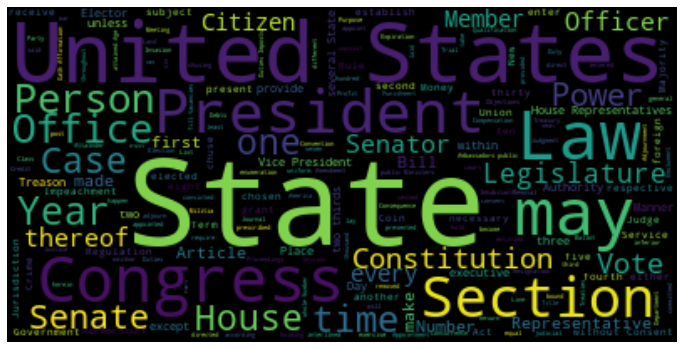

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

# 텍스트 파일 불러오기
f = open(file_path_ch02 + 'constitution.txt')
text = f.read()
f.close()

# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud = WordCloud().generate(text)
print(
    {i:'{:.4f}'.format(j) for i, j in wordcloud.words_.items()}
)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

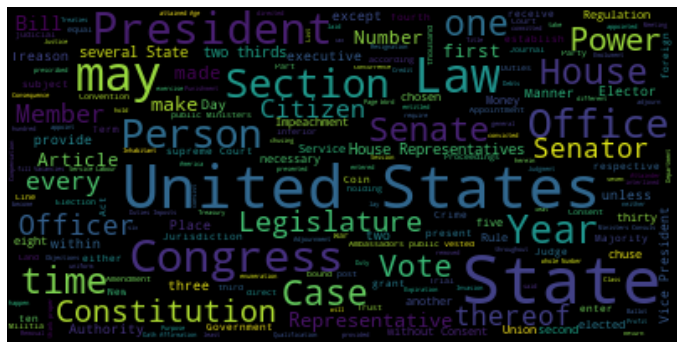

In [11]:
# 단어별 빈도 계산
wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

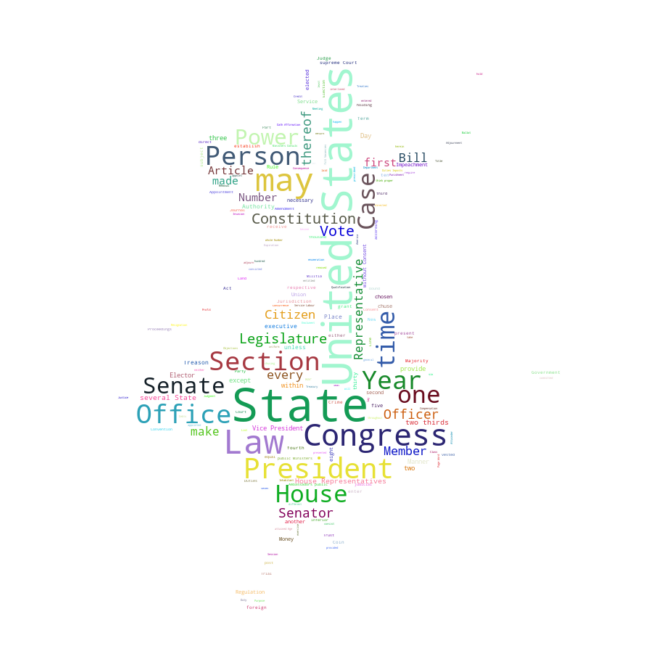

In [12]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# 이미지 불러오기
filename = file_path_ch02 + 'alice_mask.png'
f = Image.open(filename)
alice_mask = np.array(f)

# 삭제할 단어와 추가
stopwords = set(STOPWORDS)
stopwords.add('said')

# 텍스트 파일 불러오기
f = open(file_path_ch02 + 'constitution.txt')
text = f.read()
f.close()

# 단어별 빈도 계산(공백으로 분리되 단어)
wordcloud = WordCloud(background_color = 'white', max_words=2000, mask=alice_mask,
                     stopwords=stopwords)
wordcloud = wordcloud.generate(text)

# 색상 함수
def wc_color(word, font_size,  position, orientation,
            random_state=None, **kwargs):
    return tuple(np.random.randint(0, 255, (3)))

# 워드클라우드 작성
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=wc_color, random_state=2),
          interpolation='bilinear')
plt.axis('off')
plt.show()

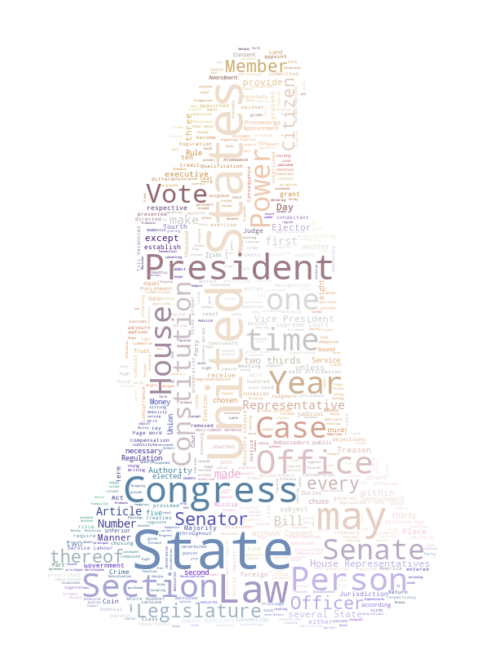

In [13]:
from wordcloud import ImageColorGenerator # 이미지에서 색 추출

# 이미지 불러오기
filename = file_path_ch02 + 'alice_color.png'
alice_color = np.array(Image.open(filename))
image_color = ImageColorGenerator(alice_color) # 이미지에서 색 추출

# 삭제할 단어와 추가
stopwords = set(STOPWORDS)
stopwords.add('said')

# 텍스트 파일 불러오기
f = open(file_path_ch02 + 'constitution.txt')
text = f.read()
f.close()

# 단어별 빈도 계산(공백으로 분리되 단어)
wordcloud = WordCloud(background_color = 'white', max_words=2000, mask=alice_color,
                     stopwords=stopwords)
wordcloud = wordcloud.generate(text)

# 워드클라우드 작성
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_color),
          interpolation='bilinear')
plt.axis('off')
plt.show()

>### 한글 워드클라우드
- `NLTK`(Natural Language Toolkit) 자연어 처리 패키지
    - `pip install nltk`
    - `NLTK` 패키지는 교육용으로 개발된 자연어 처리 및 문석 분석용 파이선 패키지
    - 다양한 기능 및 예제를가지고 있으며 실무 및 연구에서도 많이 사용
    - `NTLK` 패키지가 제공하는 주요 기능
        - 말뭉치
        - 토큰 생성
        - 형태소 분석
        - 품사 태깅

가장 많이 나온 10개 단어
 [('것', 655), ('우리', 306), ('국민', 295), ('정부', 280), ('수', 280), ('등', 242), ('경제', 238), ('사회', 234), ('위', 202), ('여러분', 181)] 

삭제할 단어 리스트
 ['\ufeff', '존경', '국민', '여러분', '오늘', '위해', '저', '제', '이', '준', '도', '번', '새', '틈', '숱', '의', '수', '것', '우리', '수', '앞', '활', '학', '중', '일', '국', '네', '빼', '살', '항', '등', '날', '를', '로', '행', '향', '날', '그', '만', '호', '를', '점', '로', '안', '위', '각', '창', '리', '략', '복', '위', '층', '뼈', '더', '업', '농', '시'] 

삭제될 단어를 제외한 최상위 10개 단어
 [('정부', 280), ('경제', 238), ('사회', 234), ('문제', 181), ('정책', 159), ('국가', 137), ('추진', 125), ('투자', 122), ('혁신', 119), ('세계', 113)] 



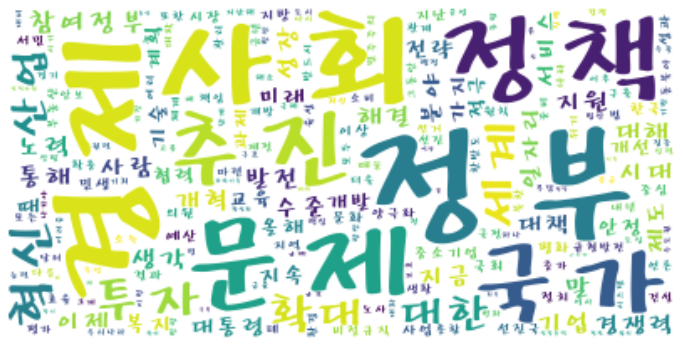

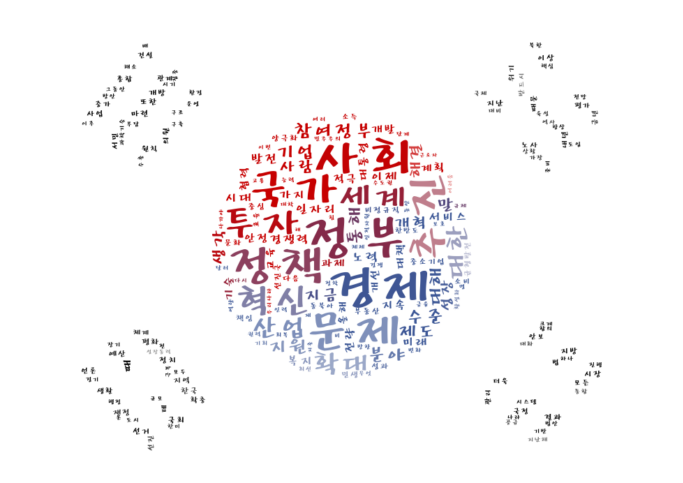

In [14]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt
from collections import Counter

t = Okt()

# 텍트스 파일 불러오기
f = open(file_path_ch02 + 'speech.txt', encoding='utf-8')
ko_con_text = f.read()
f.close()

# 명사 추출
tokens_ko = t.nouns(ko_con_text)
print('가장 많이 나온 10개 단어\n', Counter(tokens_ko).most_common(10), '\n')

# 단어 삭제
stop_words = []
f = open(file_path_ch02 + 'stop_word.txt', encoding='utf-8')
lines = f.readlines()
f.close()
for line in lines:
    stop_words.append(line.strip())
print('삭제할 단어 리스트\n', stop_words, '\n')

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
print('삭제될 단어를 제외한 최상위 10개 단어\n', Counter(tokens_ko).most_common(10), '\n')

sel_word = nltk.Text(tokens_ko)
data = sel_word.vocab().most_common(1000) # vocab() 메서드 사용하면 FreqDist 자료형으로 Counter와 비슷하게 만들어짐
                                          # Counter에서 접근하는 most_common 메서드로 고대로 접근
                                          # 둘이 관련이 있는 거신강?!
tmp_data = dict(data)

# 단어별 빈도 계산 (공백으로 분리된 단어)
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HYBDAM.ttf',
                     background_color='white')
wordcloud = wordcloud.generate_from_frequencies(tmp_data)

# 워드클라우드 작성
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 이미지 불러오기
korea_color = np.array(Image.open(
        file_path_ch02 + 'south-korea-flag.png'))
image_colors = ImageColorGenerator(korea_color)

# 단어별 빈도 계산 (공백으로 분리된 단어)
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HYBDAM.ttf',
                      relative_scaling=.2,
                      mask=korea_color, background_color='white',
                      min_font_size=1, max_font_size=80)
wordcloud = wordcloud.generate_from_frequencies(tmp_data)

# 워드클라우드 작성
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

## 문장을 벡터로 변환

>### Word2Vec
- 문장 내부의 단어를 벡터로 변환 (임베딩(Embedding))
- 단어의 연결을 기반으로 단어의 연관성을 벡터로 생성하여 단어의 의미를 파악
- `gensim` 라이브러리를 설치하고 말뭉치(corpus)라고 불리는 단어 사전을 생성하여 데이터를 준비하고 학습
    - pip install gensim
    - `pip unistall gensim`
    - install TDM GCC
    - pip install --upgrade gensim
- `KoNLPy`의 `Twitter` 형태소 분석기로 형태소로 나누고 `Word2Vec`으로 읽어 데이터를 생성

In [15]:
from gensim.models import word2vec

In [ ]:
# utf-16 인코딩으로 파일을 열고 글자를 출력하기 --- (%1)
fp = codecs.open(file_path_ch02 + 'BEXX0003.txt', 'r', encoding='utf-16')
soup = BeautifulSoup(fp, 'html.parser')
body = soup.select_one('body > text')
text = body.getText()

# 텍스트를 한 줄씩 처리하기
twitter = Okt()
results = []
lines = text.split('\n')
for line in lines:
    # 형태소 분석하기
    # 단어의 기본형 사용
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외
        if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
            r.append(word[0])
    rl = (' '.join(r)).strip()
    results.append(rl)

# 파일로 출력하기
wakati_file = 'toji.wakati'
with open(wakati_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))
    
# Word2Vec 모델 만들기
data = word2vec.LineSentence(wakati_file) # 텍스트 읽기
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1) # 모델 생성
model.save(file_path_ch02 + 'toji.model')
print('ok')

In [16]:
model = word2vec.Word2Vec.load(file_path_ch02 + 'toji.model')
model.wv.most_similar('땅') # 입력한 단어와 유사한 단어

C:\Users\Affinity\.conda\envs\ds\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[('각', 0.9285708069801331),
 ('꾼', 0.9162250757217407),
 ('봇짐', 0.8953264355659485),
 ('조상', 0.8933743238449097),
 ('기틀', 0.8869536519050598),
 ('총', 0.884739100933075),
 ('작정', 0.8830253481864929),
 ('백', 0.8818249702453613),
 ('벼슬길', 0.8799862861633301),
 ('대가', 0.8788503408432007)]

In [17]:
model.wv.similarity('땅', '조상')

0.8933743

In [18]:
model.wv.most_similar(positive=['땅', '조상'], negative=['젊은이'], topn=2)

[('송장', 0.836860179901123), ('각', 0.8294554352760315)]

## 베이즈 정리로 텍스트 분류하기

>### 베이지안 필터 (Basian filter)
- 베이즈 정리를 이용한 텍스트 분류 학습으로 지도학습
    - 확률에 기반한 classification 알고리즘
    - 통계를 기반으로 하는 분류 알고리즘
- 나이브 베이즈 분류(Naive bayes classifier) 알고리즘을 사용
- 학습을 많이 시키면 시킬수록 필터의 분류 능력이 상승
- 메일 서비스의 스팸 메일을 구분하거나 커뮤니티 사이트에서 스팸 글을 구분할 때 사용
    - 이전의 스팸 메일은 키워드 입력을 통하여 구분

>### 조건부 확률
- 어떤 한 사상 A가 발생했다는 조건 하에 다른 사상 B가 발생할 확률
$$\text{P(B|A)}={{\text{P(A}\cap\text{B)}}\over{\text{P(A)}}}$$
- 조건부 확률의 성질
    - $\text{P(}\emptyset\text{|A)}=0$
    - $\text{P(}\text{B}^\text{c}\text{|A)}=1-\text{P(B}\text{|A)}$
    - $\text{P[(A}\cup\text{B)|C]}=\text{P(A|C)}+\text{P(B|C)}-\text{P[(A}\cup\text{B)|C]}$

>### 예제<br>
><table class="table table-striped table-bordered" style="width:600px">
    <thead>
        <tr>
            <th style='width:150px'>성별</th>
            <th style='width:150px'>헌혈 경험 존재 O</th>
            <th style='width:150px'>헌혈 경험 없음 X</th>
            <th style='width:150px'>합계</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>남</td>
            <td>32</td>
            <td>20</td>
            <td>52</td>
        </tr>
        <tr>
            <td>여</td>
            <td>25</td>
            <td>23</td>
            <td>48</td>
        </tr>
        <tr>
            <td>계</td>
            <td>57</td>
            <td>43</td>
            <td>100</td>
        </tr>
    </tbody>
<table/>
    
>- 어느 고등학교 학생 100명을 대상으로 헌혈을 한 경험이 있는지 조사하였더니 다음 표와 같았다. 이 중에서 여학생 한 명을 선택했을 때, 이 학생이 헌혈을 한 적이 있는 학생일 확률은?
- $\text{A}$ : 선택된 학생이 여학생인 경우
- $B$ : 선택된 학생이 헌혈을 한 경험이 있는 경우
- $\text{A}\cap\text{B}$
- $\text{P(A)}={{n(A)}\over{n(S)}}={{48}\over{100}}=0.48$
- $\text{P(A}\cap\text{B)}={{n(A}\cap\text{B)}\over{n(S)}}={{25}\over{100}}=0.25$
- $\text{P(B|A)}={{P(A}\cap\text{B)}\over{P(A)}}={{0.25}\over{0.48}}=0.52$

>### 조건부 확률의 곱셈법칙
$$\text{P(B|A)}\,=\,\frac{\text{P(A}\cap\text{B)}}{\text{P(A)}}$$
$$\text{P(A|B)}\,=\,\frac{\text{P(A}\cap\text{B)}}{\text{P(B)}}$$
$$\text{P(A}\cap\text{B)}\,=\,\text{P(A)}\text{P(B|A)}\,=\,\text{P(B)}\text{P(A|B)}$$

>### 베이즈 정리
- 영국 철학자 Thomas Bayes의 이름에서 유래된 정리로 사건 A의 확률을 새로운 정보 B에 의해 Update하는 방법
- 즉, Bayes Theorem은 $\text{P(A|B)}$을 구하는데 유용한 정리
- Update하기 전 사건 A의 확률($\text{P(A)}$)을 사전 확률(_Prior Probability_),
- Update한 후에 구해진 확률($\text{P(A|B)}$을 사후 확률(_Posterior Probability_)라고 부름

>### 베이즈 정리로 텍스트 분류하기
- 표본공간 $S$에 대해서 다음 조건을 만족시키는 사상 $A_1,\,A_2,...\,,A_n$로 $S$를 분할시킬 수 있다.
$$S=\bigcup_{i=1}^{n}A_i\quad{\forall\,i,\,j\in\{1,2,...,n\},\;A_i\neq\emptyset}\;and\;{A_i}\cap{A_j}$$
- $B\in{S}$일 때,  $P(B|A_k)$뿐만 아니라 $P(A_k|B)$와 같은 조건부 확률에 관심
$$P(A_k|B)=\frac{P(A_k\cap{B})}{P(B)}$$
- 여기에서 $P(B)$는 $P(A_1\cap{B}),\,P(A_2\cap{B}),\,...,P(A_n\cap{B})$의 합사상
$$P(B)=P(A_1\cap{B})+P(A_1\cap{B})+\cdot\cdot\cdot+P(A_1\cap{B})$$
- 또한 $P(A_i\cap{B}$는 조건부 확률의 곱셈법칙을 이용하여 구할 수 있음
$$P(A_i\cap{B})\,=\,P(A_i)P(B|A_i)$$
- 전확률 공식
$$P(B)\,=\,\sum_{i=1}^{n}P(A_i)P(B|A_i)$$
- 베이즈 정리
$$P(A_k|B)\,=\,\frac{P(A_k\cap{B})}{P(B)}\,=\,\frac{P(A_k)P(B|A_k)}{\sum_{i=1}^{n}{P(A_i)P(B|A_i)}}$$

>### 나이브 베이지안 분류
- 나이브 베이지안(Naive Bayesian) 분류법은 속성변수들과 범주변수가 확률분포를 따른다고 간주하여 베이즈 정리와 조건부 독립성을 활용한 분류기법
- 속성변수들이 범주형일 때 주로 사용되나, 연속형인 경우에도 확률분포의 형태를 가정하여 사용 가능
- 어떤 객체 x에 대한 범주를 Y
    - x가 주어질 때 Y의 조건부 확률분포는 베이즈 정리에 의해
    $$f(y|x)\propto{f(y)f(x|y)},\quad{y=1,2,\cdot\cdot\cdot,j}$$
    - 여기서, $f(y)$는 Y의 사전분포(prior), $f(y|x)$는 x의 관측 후 사후분포(posterior)
- 나이브 베이지안 분류법은 이 사후분포를 산출하여 가장 큰 값을 가지는 범주를 객체 x에 부여
- 사후분포를 정확한 계산을 위해서 비례상수가 필요하나 범주를 부여하기 위해서는 오른쪽의 두 항을 산출하면 가능(모든 범주 Y에 대해 P(x)는 공통)
- $f(y)$는 속성변수들의 조건부 결합확률분포
    - 나이브 베이지안에서는 조건부 독립성을 이용하여 이를 평가
    - 확률변수 $X_1$,$X_2$, Y에 대하여 다음이 성립하면 Y가 주어질 때  $X_1$과 $X_2$가 조건부 독립
    $$P(X_1=x_1|X_2,\,Y)\,=\,P(X_1=x_1|Y)$$
- 따라서 속성변수들의 범주가 주어질 때(동일한 범주 내에서) 서로 독립이라 가정하면
$$f(y|x)\propto{f(y)}\prod_{i=1}^{p}{f_{x_i}(x_i|y)}$$
    - 사후 확률(또는 비례항)을 평가하기 위해 학습표본으로부터 Y의 사전확률 및 각 속성변수별 분포를 추청
- Y의 사전확률 및 각 속성변수별 분포
    - $f(y)$ : 범주 $y$의 상대도수, $y=1,2,...,j$
    - $f_{x_i}(x_i|y)$ : 범주 $y$인 객체 중에서 $X_i=x_i$인 객체의 비율
- 사후 혹률이 산출된 후에는 가장 큰 값을 갖는 범주를 선택하여 객체 x에 부여
- 장점
    - 단순하고 빠르며 효과적
    - noise와 missing value가 있어도 well-done
    - training에 있어 상대적으로 적은 데이터가 필요
    - 예측에 대한 추정된 확률을 얻기 쉬움
- 단점
    - 모든 속성은 동등하게 중요하고 독립이라고 가정(open-faulty assumption)
    - 연속성 수치 속성으로 구성된 데이터셋에 이상적이지 않음(discretization 필요)
    - 추정된 확률은 예측된 범주보다 신뢰성이 떨어짐

>### 라플라스 추정값(Laplas estimator)
$$x\,=\,(x_1,x_2,\cdot\cdot\cdot,x_{p-1},None)^T$$
- 위와 같이 훈련 데이터가 없는 경우가 테스트 케이스에 포함되어 있으면 구한 조건부 확률이 0이 될 수 있음
- 이를 방지하기 위해 확률이 0이 되지 않도록 임의의 값(default=1)을 부여하여 계산
- 라플라스 추정값은 각 속성별로 서로 다른 값을 부여할 수도 있음
- 속성의 중요도에 따라 서로 다른 값을 부여할 수도 있음
- 훈련 데이터셋이 충분히 크다면 라플라스 추정값은 고려하지 않아도 됨

In [19]:
from bayes import *
bf = BayesianFilter()

# 텍스트 학습
text_li = [
    '파격 세일 - 오늘까지만 30% 할인',
    '쿠폰 선물 & 무료 배송',
    '현데계 백화점 세일',
    '봄과 함께 찾아온 따뜻한 신제품 소식',
    '인기 제품 기간 한정 세일',
    '오늘 일정 확인',
    '프로젝트 진행 상황 보고',
    '계약 잘 부탁드립니다.',
    '회의 일정이 등록되었습니다.',
    '오늘 일정이 없습니다.'
]
cat_li = ['광고'] * 5 + ['중요'] * 5
for text, category in zip(text_li, cat_li):
    bf.fit(text, category)

# 예측
pre, scorelist = bf.predict('재고 정리 할인, 무료 배송')
print('결과 =', pre)
print(scorelist)

결과 = 광고
[('광고', -19.485641988358296), ('중요', -20.63806741338132)]


In [20]:
df = pd.read_csv(file_path_ch02 + 'sms_spam.csv',
                header=0, encoding='ansi')
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or 짙10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
5,ham,Aiya we discuss later lar... Pick u up at 4 is...
6,ham,Are you this much buzy
7,ham,Please ask mummy to call father
8,spam,Marvel Mobile Play the official Ultimate Spide...
9,ham,"fyi I'm at usf now, swing by the room whenever"


In [21]:
# 베이지안 필터 학습
bf =  BayesianFilter()
for i in df.index:
    bf.fit(df.text[i], df.type[i])

In [22]:
# 예측
df_test = pd.read_csv(file_path_ch02 + 'sms_spam_test.csv',
                     header=0, encoding='ansi')
df_test

,type,text
0,spam,Free msg: Single? Find a partner in your area!...
1,spam,Want to funk up ur fone with a weekly new tone...
2,ham,Even my brother is not like to speak with me. ...
3,ham,Wow. I never realized that you were so embaras...
4,spam,URGENT This is our 2nd attempt to contact U. Y...
5,ham,Yes..gauti and sehwag out of odi series.
6,spam,Free Msg: Ringtone!From: http://tms. widelive....
7,ham,Aft i finish my lunch then i go str down lor. ...
8,spam,You have an important customer service announc...
9,spam,tells u 2 call 09066358152 to claim 짙5000 priz...


``` python
DataFrame.eq
    Compare DataFrames for equality elementwise.
DataFrame.ne
    Compare DataFrames for inequality elementwise.
DataFrame.le
    Compare DataFrames for less than inequality or equality elementwise.
DataFrame.lt
    Compare DataFrames for strictly less than inequality elementwise.
DataFrame.ge
    Compare DataFrames for greater than inequality or equality elementwise.
DataFrame.gt
    Compare DataFrames for strictly greater than inequality elementwise.
```

In [24]:
pred = []
for x in df_test.text:
    pre, scorelist = bf.predict(x)
    pred.append(pre)
    print('예측 결과 : {}'. format(pre))
    print('예측 점수\n :', scorelist, '\n')
print(pred, '\n')

df_test['pred'] = pred
print('예측률 : {:5.1f}'.format((df_test.type == df_test.pred).mean() * 100))
df_test.head(10)

예측 결과 : spam
예측 점수
 : [('ham', -253.26336787943671), ('spam', -219.50440600523493)] 

예측 결과 : spam
예측 점수
 : [('ham', -246.76792140374928), ('spam', -207.6443336201288)] 

예측 결과 : ham
예측 점수
 : [('ham', -109.56355145389888), ('spam', -130.50297964520914)] 

예측 결과 : ham
예측 점수
 : [('ham', -380.45210126700283), ('spam', -475.12755379672154)] 

예측 결과 : spam
예측 점수
 : [('ham', -249.62222459285147), ('spam', -192.98671330402118)] 

예측 결과 : ham
예측 점수
 : [('ham', -64.03626327656411), ('spam', -71.43383444654606)] 

예측 결과 : spam
예측 점수
 : [('ham', -228.97792278029485), ('spam', -198.28276170084865)] 

예측 결과 : ham
예측 점수
 : [('ham', -138.3720731312302), ('spam', -179.04958207653036)] 

예측 결과 : spam
예측 점수
 : [('ham', -117.41540680162049), ('spam', -94.95527926812692)] 

예측 결과 : spam
예측 점수
 : [('ham', -176.57923965891237), ('spam', -147.34374212949817)] 

예측 결과 : spam
예측 점수
 : [('ham', -271.03026942726774), ('spam', -211.29009670696811)] 

예측 결과 : ham
예측 점수
 : [('ham', -36.039982940557074), ('spam', -4

,type,text,pred
0,spam,Free msg: Single? Find a partner in your area!...,spam
1,spam,Want to funk up ur fone with a weekly new tone...,spam
2,ham,Even my brother is not like to speak with me. ...,ham
3,ham,Wow. I never realized that you were so embaras...,ham
4,spam,URGENT This is our 2nd attempt to contact U. Y...,spam
5,ham,Yes..gauti and sehwag out of odi series.,ham
6,spam,Free Msg: Ringtone!From: http://tms. widelive....,spam
7,ham,Aft i finish my lunch then i go str down lor. ...,ham
8,spam,You have an important customer service announc...,spam
9,spam,tells u 2 call 09066358152 to claim 짙5000 priz...,spam


## 문장의 유사도

>### 문장의 유사도 분석
- 두 개의 문장이 비슷한 것인지 또는 관련이 있는 것인지 분석

>### 레벤슈타인 거리(Lvenshtein Distance)
- 레벤슈타인 거리는 두 개의 문자열이 어느 정도 다른지를 나타내는 것
- 편집 거리(Edit Distance)라고 부르기도 함
- 철자 오류 수정, 비슷한 어구 검색, 의학 분야에서 DNA 배열의 유사성 등을 판단할 때 사용
- 어떤 문자열을 비교하려는 문자열로 편집할 때 몇 번의 문자열 조작이 필요한지에 주목하여 단어의 거리를 계산
- $\text{가나다라}\;\rightarrow\;\text{가마바라}$로 변환
    <table style='width:400px'>
        <thead>
            <tr>
                <th style='width:100px'><center>횟수</center></th>
                <th style='width:200px'><center>편집 조작</center></th>
                <th style='width:100px'><center>결과</center></th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <th><center>0</center></th>
                <th><center>-</center></th>
                <th><center>가나다라</center></th>
            </tr>
            <tr>
                <th><center>1</center></th>
                <th><center>'나'를 '마'로 조작</center></th>
                <th><center>가마다라</center></th>
            </tr>
            <tr>
                <th><center>2</center></th>
                <th><center>'다'를 '바'로 조작</center></th>
                <th><center>가마바라</center></th>
            </tr>
        </tbody>
    </table>
- 2회 조작으로 변경했으므로 편집 비용(레벤슈타인 거리)는 2

In [25]:
matrix = [[] for i in range(5+1)]
matrix

[[], [], [], [], [], []]

In [26]:
def calc_distance(a, b):
    if a == b:
        return 0
    if a == '':
        return len(b)
    if b == '':
        return len(a)
    
    # 2차원 표 (len(a)+1, len(b)+1) 준비 --- (%1)
    matrix = [[] for i in range(len(a) + 1)]
    for i in range(len(a) + 1): # 0으로 초기화
        matrix[i] = [0 for i in range(len(b) + 1)]
    # index와 column 초기값 설정
    for i in range(len(a) + 1):
        matrix[i][0] = i
    for j in range(len(b) + 1):
        matrix[0][j] = j
    # 표 채우기 --- (%2)
    for i in range(1, len(a) + 1):
        ac = a[i-1]
        for j in range(1, len(b) + 1):
            bc = b[j-1]
            cost = 0 if ac == bc else 1
            matrix[i][j] = min(
                matrix[i-1][j] + 1, # 문자 삽입
                matrix[i][j-1] + 1, # 문자 제거
                matrix[i-1][j-1] + cost # 문자 변경
            )
    return matrix[len(a)][len(b)]

# 단어의 유사도 정도 체크
print(calc_distance('가나다라', '가마바라'))
print(calc_distance('가나다', '제육덮밥'))

# 지하철 역 유사 정도
samples = ['신촌역', '신천군', '신천역', '신발', '마곡역']
base = samples[0]
r = sorted(samples, key=lambda x : calc_distance(base, x))
for x in r:
    print(calc_distance(base, x), x)

2
4
0 신촌역
1 신천역
2 신천군
2 신발
2 마곡역


>### N-gram 유사도
- N-gram은 텍스트에서 이웃한 N개의 문자를 의미
- 서로 다른 2개의 문장을 N-gramd으로 비교하면 출현하는 단어의 종류와 빈도를 확인
    - 논문 도용, 라이센스가 있는 프로그램 코드의 복사여부 등을 확인

In [27]:
# 문장을 N-gram으로 나누기
def ngram(s, num):
    res = []
    slen = len(s) - num + 1
    for i in range(slen):
        ss = s[i:i+num]
        res.append(ss)
    return res

# 두 문장의 유사도 측정
def diff_ngram(sa, sb, num):
    a = ngram(sa, num)
    b = ngram(sb, num)
    r, cnt = [], 0
    for i in a:
        for j in b:
            if i == j:
                cnt += 1
                r.append(i)
    return cnt / len(a), r

In [28]:
a = '파이썬으로 하는 빅데이터 분석과 머신러닝은 매우 쉽습니다.'
b = '빅데이터 분석과 머신러닝은 파이썬을 이용하여 매우 쉽게 할 수 있습니다.'

# 2-gram 유사도
r_2gram, word_2gram = diff_ngram(a, b, 2)
print('2-gram', r_2gram, word_2gram)

# 3-gram 유사도
r_3gram, word_3gram = diff_ngram(a, b, 3)
print('3-gram', r_3gram, word_3gram)

2-gram 0.7419354838709677 ['파이', '이썬', '빅데', '데이', '이터', '터 ', ' 분', '분석', '석과', '과 ', ' 머', '머신', '신러', '러닝', '닝은', '은 ', ' 매', '매우', '우 ', ' 쉽', '습니', '니다', '다.']
3-gram 0.6333333333333333 ['파이썬', '빅데이', '데이터', '이터 ', '터 분', ' 분석', '분석과', '석과 ', '과 머', ' 머신', '머신러', '신러닝', '러닝은', '닝은 ', ' 매우', '매우 ', '우 쉽', '습니다', '니다.']


## chapter 3. 요약
- Python은 정형데이터 이외에 비정형 데이터 분석을 위한 다양한 라이브러리를 제공
- 비정형 자료를 이용한 예측 및 분류 등을 수행할 수 있음
    - Python에서 비정형 자료의 분석 기법을 습득하므로서 다양한 데이터 분석 방법의 기본지식 확보
    - 비정형 자료 분석을 위한 기술 확보
        - 비정형 자료의 시각화 및 분석 기술을 습득
        - 현장 문제에 적용 가능한 수준까지 프로그래밍 기술 습득